In [1]:
import torch
import numpy as np

In [5]:
rand_tensor = torch.rand((3,4))
print(f"random tensor: \n {rand_tensor}")
print(f"shape of tensor: {rand_tensor.shape}")
print(f"datatype of tensor: {rand_tensor.dtype}")
print(f"device tensor is stored on: {rand_tensor.device}")

random tensor: 
 tensor([[0.5076, 0.3840, 0.3926, 0.7118],
        [0.2943, 0.7780, 0.3868, 0.2467],
        [0.5433, 0.5684, 0.3426, 0.9277]])
shape of tensor: torch.Size([3, 4])
datatype of tensor: torch.float32
device tensor is stored on: cpu


In [7]:
tensor = torch.ones(4,4)
tensor[:, 2] = 0
tensor[2,:] = 0
print(tensor)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [0., 0., 0., 0.],
        [1., 1., 0., 1.]])


In [10]:
t1 = torch.cat([tensor, tensor, tensor], dim=0)
print(t1)

tensor([[1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [0., 0., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [0., 0., 0., 0.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [1., 1., 0., 1.],
        [0., 0., 0., 0.],
        [1., 1., 0., 1.]])


In [11]:
from torchvision.models import resnet18, ResNet18_Weights

In [12]:
model = resnet18(weights=ResNet18_Weights.DEFAULT)
print(model)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/jeffreydiament/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100.0%


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [15]:
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)
prediction = model(data)

In [16]:
loss = (prediction - labels).sum()
loss

tensor(-493.7556, grad_fn=<SumBackward0>)

In [17]:
loss.backward()

In [18]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [19]:
optim.step()

In [20]:
from torch import nn, optim
model = resnet18(weights=ResNet18_Weights.DEFAULT)

# freeze all the parameters in the network
for param in model.parameters():
    param.requires_grad = False

In [23]:
model.fc = nn.Linear(512, 10)

In [25]:
optimizer = optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

In [26]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [48]:
class ConvNet(nn.Module):
    
    def __init__(self):
        super(ConvNet, self).__init__()
        # 1 input channel, 6 output channels, 5x5 square convolution
        # 32x32 -> 6x 28x28
        self.conv1 = nn.Conv2d(1, 6, 5) 
        
        # max pooling over (2,2) window
        # 6x 28x28 -> 6x 14x14
        self.pool1 = nn.MaxPool2d(2)
        
        # 6 input channel, 10 output channels, 5x5 square convolution
        # 6x 14x14 -> 16x 10x10
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # max pooling over (2,2) window
        #  16x 10x10 -> 16x 5x5
        self.pool2 = nn.MaxPool2d(2)       
        
        # fully connected
        # 16x5x5 -> 120
        self.fc1 = nn.Linear(16*5*5, 120)
        
        # fully connected
        # 120 -> 84
        self.fc2 = nn.Linear(120, 84)
        
        # fully connected
        # 84 -> 10
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool2(x)
        
        x = torch.flatten(x, start_dim=1) # flatten everything except batch dimension 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [50]:
model = ConvNet()
print(model)

ConvNet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [36]:
params = [p for p in model.parameters()]
print(len(params))


10


In [52]:
input = torch.randn(1, 1, 32, 32)

# forward pass
out = model(input)
print(out)

# backward pass
model.zero_grad()


tensor([[ 0.0819,  0.0719, -0.0525, -0.0305, -0.0648,  0.0409, -0.0289, -0.0480,
          0.0791, -0.0450]], grad_fn=<AddmmBackward0>)


In [60]:
target = torch.randn(10)
print(target.size())
target = target.view(1,-1)
print(target.size())


torch.Size([10])
torch.Size([1, 10])


In [65]:
criterion = nn.MSELoss()
loss = criterion(out, target)
print(loss)

tensor(0.9119, grad_fn=<MseLossBackward0>)


In [66]:
print(out)
print(target)

tensor([[ 0.0819,  0.0719, -0.0525, -0.0305, -0.0648,  0.0409, -0.0289, -0.0480,
          0.0791, -0.0450]], grad_fn=<AddmmBackward0>)
tensor([[ 0.6226, -0.1915, -0.3153,  1.0338,  1.3273, -0.4298, -0.1285,  1.3339,
          1.6587, -1.0353]])


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms


In [2]:
# hyperparameters
batch_size = 4
lr = 1e-3
momentum = 0.9
epochs = 2

In [3]:


# converts input image to tensor and then scales values from [0, 1] -> [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # 3 input channel2, 6 output channels, 5x5 square convolution
        # 32x32 -> 6x 28x28
        self.conv1 = nn.Conv2d(3, 6, 5) 
        
        # max pooling over (2,2) window
        # 6x 28x28 -> 6x 14x14
        self.pool = nn.MaxPool2d(2, 2)
        
        # 6 input channel, 10 output channels, 5x5 square convolution
        # 6x 14x14 -> 16x 10x10
        self.conv2 = nn.Conv2d(6, 16, 5)     
        
        # fully connected
        # 16x5x5 -> 120
        self.fc1 = nn.Linear(16*5*5, 120)
        
        # fully connected
        # 120 -> 84
        self.fc2 = nn.Linear(120, 84)
        
        # fully connected
        # 84 -> 10
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.pool(x)

        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool(x)
        
        x = torch.flatten(x, start_dim=1) # flatten everything except batch dimension 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=lr, momentum=momentum)

In [6]:
for epoch in range(epochs):
    running_loss = 0 
    
    for i, data in enumerate(trainloader):
        # get inputs and targets
        inputs, labels = data
        
        # forward pass
        outputs = net(inputs)
        
        # calculate loss
        loss = criterion(outputs, labels)
        
        # zero gradients
        optimizer.zero_grad()
        
        # backward pass
        loss.backward()
        
        # update
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
        
print("finished training!")

[1,  2000] loss: 2.206
[1,  4000] loss: 1.880
[1,  6000] loss: 1.687
[1,  8000] loss: 1.582
[1, 10000] loss: 1.514
[1, 12000] loss: 1.495
[2,  2000] loss: 1.417
[2,  4000] loss: 1.391
[2,  6000] loss: 1.359
[2,  8000] loss: 1.331
[2, 10000] loss: 1.309
[2, 12000] loss: 1.277
finished training!


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [8]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

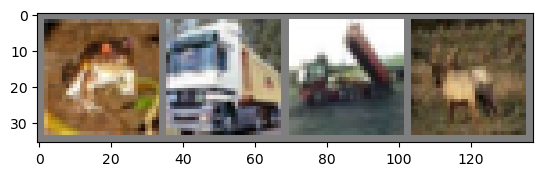

GroundTruth:  frog  truck truck deer 


In [10]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [11]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   truck truck frog 


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 55 %


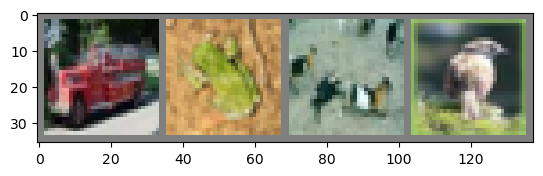

truck frog  bird  bird 


In [9]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))
